# Jupyter Notebook Example
Here we're going to be:
- loading up some data
- doing some basic analysis
- doing a very simple prediction model
    - based on my vehicle type, which day of the week would it likely be stolen on (simple logistic regression)
- looking at some common gotchas with notebooks that can trip you up

In [1]:
import pandas as pd

# TODO
- [x] data loading
- [x] summary stats
- [ ] aside to Stefanie's data morph
- [x] basic plotting
- [ ] simple inline model
- [ ] committing and PRs
- [ ] Jupytext
- [ ] re-usability
- [ ] gotchas - hidden state
- [ ] credit to https://rpubs.com/artyomashigov/stolen_vehicles for the location population data
- [ ] magic methods use
- [ ] structuring of the notebook
- [ ] reusable methods
- [ ] including methods from external files
- [ ] autoreloading for development
- [ ] summarise when these are a good idea to use and when not
- [ ] add readme with participation instructions
- [ ] data credits
   - [ ] https://www.police.govt.nz/can-you-help-us/stolen-vehicles
   - [ ] https://rpubs.com/artyomashigov/stolen_vehicles
   - [ ] https://stefaniemolin.com/talks/#data-morph-a-cautionary-tale-of-summary-statistics
   - [ ] https://stefaniemolin.com/data-morph-talk/#/introducing-data-morph
   - [ ] https://www.nzta.govt.nz/resources/new-zealand-motor-vehicle-register-statistics/


Things I should think about:
- creating some data prep method at the top that I can run against the data (commented out to start with to demonstrate state)
- methods in external files, maybe for the colab stuff?
- prepare some different branches, maybe one to add the colab stuff, that I can then do a PR on?
- time a method (make it longer if you need to lol)
- reference what a method is doing (does this work with an external method?)
- lookup https://github.com/nteract/papermill
- saving output, add sections to this notebook on those guidelines
- make this a create your own adventure notebook?

# Data Load

In [98]:
thefts_raw = pd.read_csv('data/stolen_vehicles.csv')
thefts_raw

,colour,make,model,year,type,date_stolen,location
0,Black,Nissan,SKYLINE,2007,Saloon,13/07/2024,Counties/Manukau
1,Gold,Honda,CIVIC,1997,Saloon,11/08/2024,Waikato
2,Red,Hyundai,SANTA FE,2017,Stationwagon,22/08/2024,Waitemata
3,Silver,Trailer,ELITE 8X4,2021,Trailer,15/07/2024,Canterbury
4,Silver,Trailer,ALLROAD,2021,Trailer,27/03/2024,Wellington
...,...,...,...,...,...,...,...
4964,Silver,Ford,LASER,2001,Saloon,26/02/2024,Waitemata
4965,White,Toyota,HILUX,2001,Utility,10/04/2024,Eastern
4966,Red,Holden,VX COMMODORE,2001,Saloon,21/03/2024,Central
4967,Blue,Chrysler Jeep,CHEROKEE,1995,Stationwagon,23/07/2024,Southern


In [99]:
thefts_raw.dtypes

colour         object
make           object
model          object
year            int64
type           object
date_stolen    object
location       object
dtype: object

In [104]:
thefts = thefts_raw.copy()
thefts['date_stolen'] = pd.to_datetime(thefts['date_stolen'], dayfirst=True)
thefts = thefts[thefts['make'] != 'Motorcycle']
thefts['month_stolen'] = thefts['date_stolen'].dt.month
thefts['dow_stolen'] = thefts['date_stolen'].dt.strftime('%a')
thefts['woy_stolen'] = thefts['date_stolen'].dt.strftime('%U')
thefts

,colour,make,model,year,type,date_stolen,location,month_stolen,dow_stolen,woy_stolen
0,Black,Nissan,SKYLINE,2007,Saloon,2024-07-13,Counties/Manukau,7,Sat,27
1,Gold,Honda,CIVIC,1997,Saloon,2024-08-11,Waikato,8,Sun,32
2,Red,Hyundai,SANTA FE,2017,Stationwagon,2024-08-22,Waitemata,8,Thu,33
3,Silver,Trailer,ELITE 8X4,2021,Trailer,2024-07-15,Canterbury,7,Mon,28
4,Silver,Trailer,ALLROAD,2021,Trailer,2024-03-27,Wellington,3,Wed,12
...,...,...,...,...,...,...,...,...,...,...
4964,Silver,Ford,LASER,2001,Saloon,2024-02-26,Waitemata,2,Mon,08
4965,White,Toyota,HILUX,2001,Utility,2024-04-10,Eastern,4,Wed,14
4966,Red,Holden,VX COMMODORE,2001,Saloon,2024-03-21,Central,3,Thu,11
4967,Blue,Chrysler Jeep,CHEROKEE,1995,Stationwagon,2024-07-23,Southern,7,Tue,29


In [84]:
thefts.dtypes

colour                 object
make                   object
model                  object
year                    int64
type                   object
date_stolen    datetime64[ns]
location               object
dtype: object

# Data Investigation

In [85]:
thefts.describe()

,year,date_stolen
count,4967.000000,4967
mean,1996.330179,2024-05-31 23:22:18.675256832
min,0.000000,2024-02-25 00:00:00
25%,2001.000000,2024-04-14 00:00:00
50%,2006.000000,2024-06-04 00:00:00
75%,2013.000000,2024-07-22 00:00:00
max,2024.000000,2024-08-24 00:00:00
std,145.121006,NaN


In [86]:
thefts.describe(include='object')

,colour,make,model,type,location
count,4949,4950,4940,4945,4967
unique,14,146,1178,28,13
top,Silver,Toyota,HILUX,Stationwagon,Counties/Manukau
freq,1340,1009,172,1082,744


In [87]:
for col in thefts.columns:
    print(f'-------{col}--------')
    print(thefts[col].unique())
    print(thefts.groupby(col).size().sort_values(ascending=False).head(10))

-------colour--------
['Black' 'Gold' 'Red' 'Silver' 'Grey' 'Green' 'Yellow' nan 'White' 'Cream'
 'Orange' 'Blue' 'Brown' 'Purple' 'Pink']
colour
Silver    1340
White     1040
Black      694
Blue       492
Grey       473
Red        383
Green      241
Gold        83
Brown       60
Orange      44
dtype: int64
-------make--------
['Nissan' 'Honda' 'Hyundai' 'Trailer' nan 'Briford' 'Factory Built'
 'Homebuilt' 'Titan' 'Moped' 'Custombuilt' 'Kea' 'Caravan' 'Cyclone'
 'Aprilia' 'Hoskings' 'Holden' 'Roadmaster' 'Hyosung' 'Lochiel' 'Anglo'
 'Piaggio' 'Swift' 'Suzuki' 'Sprite' 'Standard' 'Yamaha' 'Liteweight'
 'Crusader' 'Kawasaki' 'Buell' 'Diamond' 'Ci Munro' 'Pinto' 'ABI' 'PGO'
 'Superior' 'Ducati' 'Triumph' 'Jayco' 'Voyager' 'ACTIV' 'KIWIAZ' 'Ford'
 'Zephyr' 'DMW' 'John Deere' 'Steelbro' 'Reid' 'Transport Trailers'
 'Condor' 'Land Rover' 'Harley Davidson' 'Toko Trailers' 'TMC' 'Oxford'
 'Aakron Xpress' 'Fruehauf' 'Kiwi' 'Gilera' 'Daelim' 'CFMOTO' 'BMW' 'KTM'
 'Benelli' 'Mercedes-Benz' 'Mitsu

In [88]:
thefts[thefts['make'] == 'Moped']

,colour,make,model,year,type,date_stolen,location
27,Black,Moped,CHOPPER,2005,Moped,2024-07-07,Canterbury
111,Black,Moped,SYM ORBIT,2008,Moped,2024-07-24,Canterbury
221,Red,Moped,CHOPPER,2006,Moped,2024-06-21,Eastern
385,Silver,Moped,PIONEER RS 450,2007,Moped,2024-08-16,Waikato
456,Silver,Moped,PGO COMET,2008,Moped,2024-04-23,Canterbury
672,Red,Moped,YAMASAKI,2008,Moped,2024-08-16,Waikato
736,White,Moped,BAOTIAN EAGLE,2011,Moped,2024-07-16,Canterbury
742,Black,Moped,WENLING,2013,Moped,2024-04-22,Auckland City
944,Black,Moped,YIBEN,2019,Moped,2024-03-04,Auckland City
992,Red,Moped,YY50QT,2019,Moped,2024-07-11,Waitemata


<Axes: ylabel='type'>

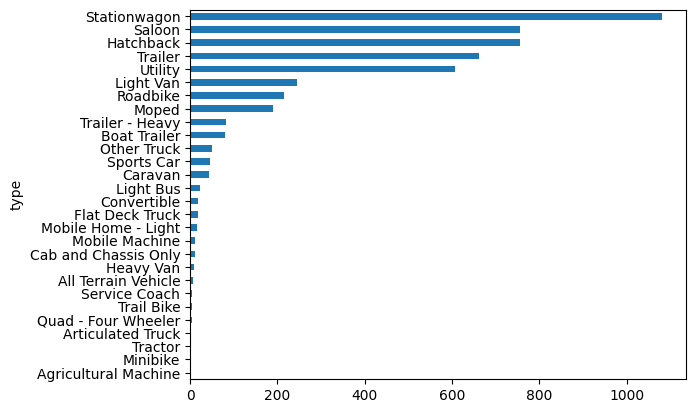

In [92]:
thefts.groupby('type').size().sort_values().plot(kind='barh')

In [95]:
thefts[thefts['type'] == 'Mobile Machine']

,colour,make,model,year,type,date_stolen,location
2472,Yellow,Hyundai,R16.9,2012,Mobile Machine,2024-06-19,Central
3245,White,Isuzu,FORWARD,1992,Mobile Machine,2024-02-25,Counties/Manukau
3609,Grey,Takeuchi,TB216,2018,Mobile Machine,2024-03-07,Wellington
3974,Grey,Polaris,RANGER EV R21MAAE4G8,2021,Mobile Machine,2024-05-06,Wellington
4035,Orange,Kubota,U55-4G,2016,Mobile Machine,2024-07-22,Waitemata
4142,White,Mobile Machine,BOBCAT E50R2,2021,Mobile Machine,2024-05-17,Eastern
4153,Orange,Kubota,K4018,2022,Mobile Machine,2024-04-05,Counties/Manukau
4163,Yellow,Kubota,KX018-4,2020,Mobile Machine,2024-04-22,Waitemata
4170,Orange,Kubota,KX018,2022,Mobile Machine,2024-07-02,Counties/Manukau
4335,Yellow,Factory Built,1.5 TONNE,2023,Mobile Machine,2024-05-25,Counties/Manukau


<Axes: xlabel='woy_stolen'>

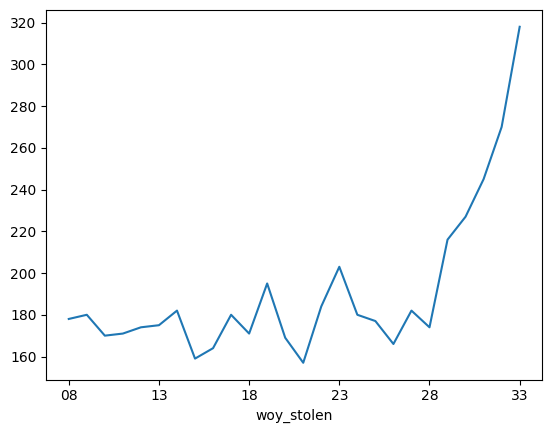

In [110]:
thefts.groupby('woy_stolen').size().plot()

# Motorbikes

In [112]:
bikes = thefts[thefts['type'] == 'Roadbike']
bikes

,colour,make,model,year,type,date_stolen,location,month_stolen,dow_stolen,woy_stolen
51,Black,Aprilia,RSV1000,2006,Roadbike,2024-06-17,Auckland City,6,Mon,24
69,Orange,Piaggio,VESPA,1970,Roadbike,2024-06-18,Wellington,6,Tue,24
105,White,Piaggio,VESPA,2008,Roadbike,2024-06-05,Wellington,6,Wed,22
122,Black,Suzuki,GSX,2006,Roadbike,2024-07-13,Counties/Manukau,7,Sat,27
129,White,Yamaha,TT250,1996,Roadbike,2024-04-02,Auckland City,4,Tue,13
...,...,...,...,...,...,...,...,...,...,...
1371,Black,Suzuki,GSX250,2024,Roadbike,2024-08-17,Wellington,8,Sat,32
1689,Black,Ducati,DIAVEL,2020,Roadbike,2024-06-29,Central,6,Sat,25
2480,White,Suzuki,GSX,2011,Roadbike,2024-06-29,Central,6,Sat,25
2564,Black,Suzuki,DR-Z400,2005,Roadbike,2024-06-26,Wellington,6,Wed,25


<Axes: ylabel='make'>

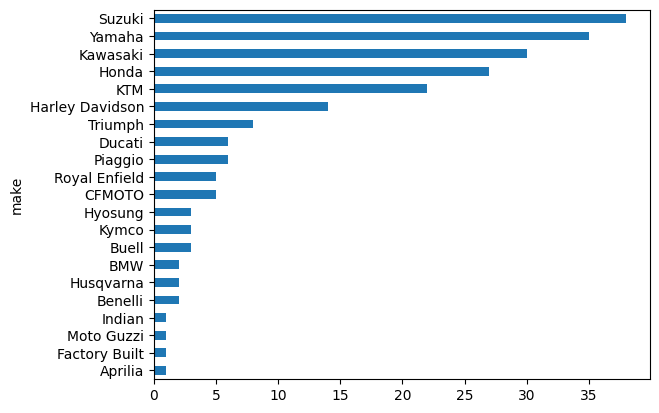

In [113]:
bikes.groupby('make').size().sort_values().plot(kind='barh')

<Axes: ylabel='location'>

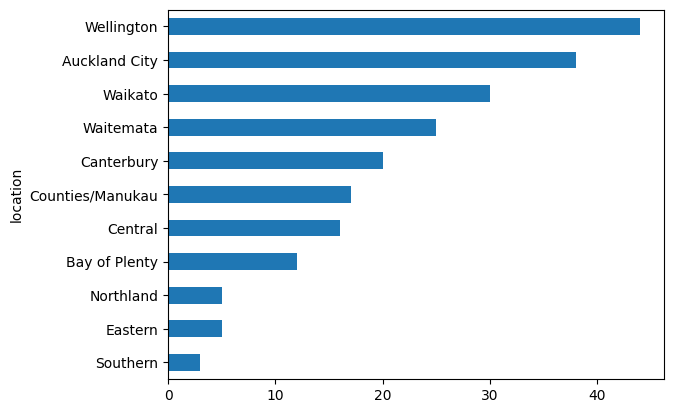

In [117]:
bikes.groupby('location').size().sort_values().plot(kind='barh')

<Axes: xlabel='woy_stolen'>

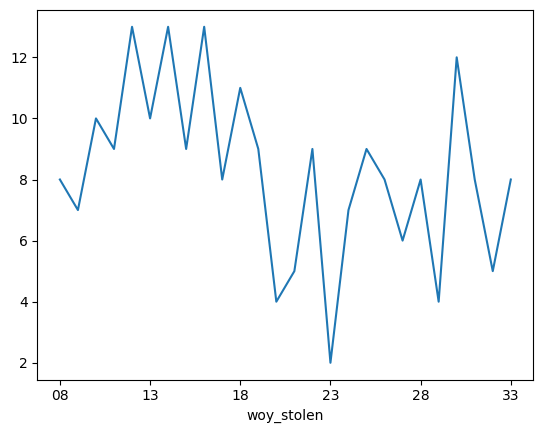

In [116]:
bikes.groupby('woy_stolen').size().plot()